<h1><center>Analysis of the mushroom dataset</h1></center>

Mushroom dataset downloaded from: https://www.kaggle.com/uciml/mushroom-classification

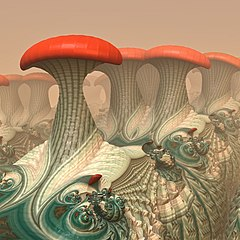

This dataset comprises of a lot of mushrooms classified either as edible or poisonous. Multiple characteristics of mushrooms are also listed. The goal of this analysis is to see if we can classify mushrooms into the two classes based on their properties, and then find out which properties are the most effective for classification.

In addition to introducing you to ML, this exercise will help you if you ever get yourself into an "Into the Wild" situation, where you have to eat mushrooms for survival.

We will first perform some exploratory data analysis to understand the data structure better. Then we will split the dataset into training and test, use the training set to train our model, followed by applying the model on the test set to validate its performance. 

### HOMEWORK INSTRUCTIONS

* This homework has 20 points
* You need the csv file mushrooms.csv for this homework. This is uploaded on Canvas already.
* Homework questions are highlighted below under the heading "Homework questions". There are 9 questions in total.
* Go through this notebook. Analyze the results and answer questions appropriately. 
* Submit answers to Canvas in a Word document with your name as the file name e.g. GauravMoghe.docx

<h2>Exploratory data analysis</h2>

In [1]:
import numpy as np; np.random.seed(1)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data

mush = pd.read_csv('mushrooms.csv')
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


First, we will perform some exploratory analysis of the data

#### HOMEWORK QUESTIONS: (2 points each)

-- How many rows and columns are there in this file?

-- Are the features numeric or categorical?

-- How many different classes do we need to predict?

In [ ]:
# view the top 5 rows of the data. How many columns are there?
#mush.head()

# After running the above command, uncomment the commands below and run this cell again

# get the size of the dataframe. How many rows and columns are there in this dataset?
print(mush.shape)

#Get some basic info
print (mush.info())

# Get some basic info on non-numerical features
mush.describe(include=['object'])

# There are different data types available. numerical (float64, int64) and non-numerical (object, boolean). 
# What are the data types of the entries in this matrix?
# Are there any numerical objects?

__Information about the different features can be [found here](https://archive.ics.uci.edu/ml/datasets/Mushroom)__

In [3]:
# Get the names of the different columns
print (mush.columns)

# After you get the names above, uncomment the command lines below and run the cell again

# Lets group the entries by class and get some idea about how cap-shape and cap-color are distributed by whether
# the mushroom is edible or poisonous
columns_to_show = ['cap-shape', 'cap-color', 'odor']

mush.groupby(['class'])[columns_to_show].describe(include=['object'])

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


cap-shape                  cap-color                   odor             \
          count unique top  freq     count unique top  freq count unique top   
class                                                                          
e          4208      5   x  1948      4208     10   n  1264  4208      3   n   
p          3916      5   x  1708      3916      8   n  1020  3916      7   f   

             
       freq  
class        
e      3408  
p      2160

Learn more about pandas data types [here](https://pbpython.com/pandas_dtypes.html)

In [4]:
mush2.head()

NameError: name 'mush2' is not defined

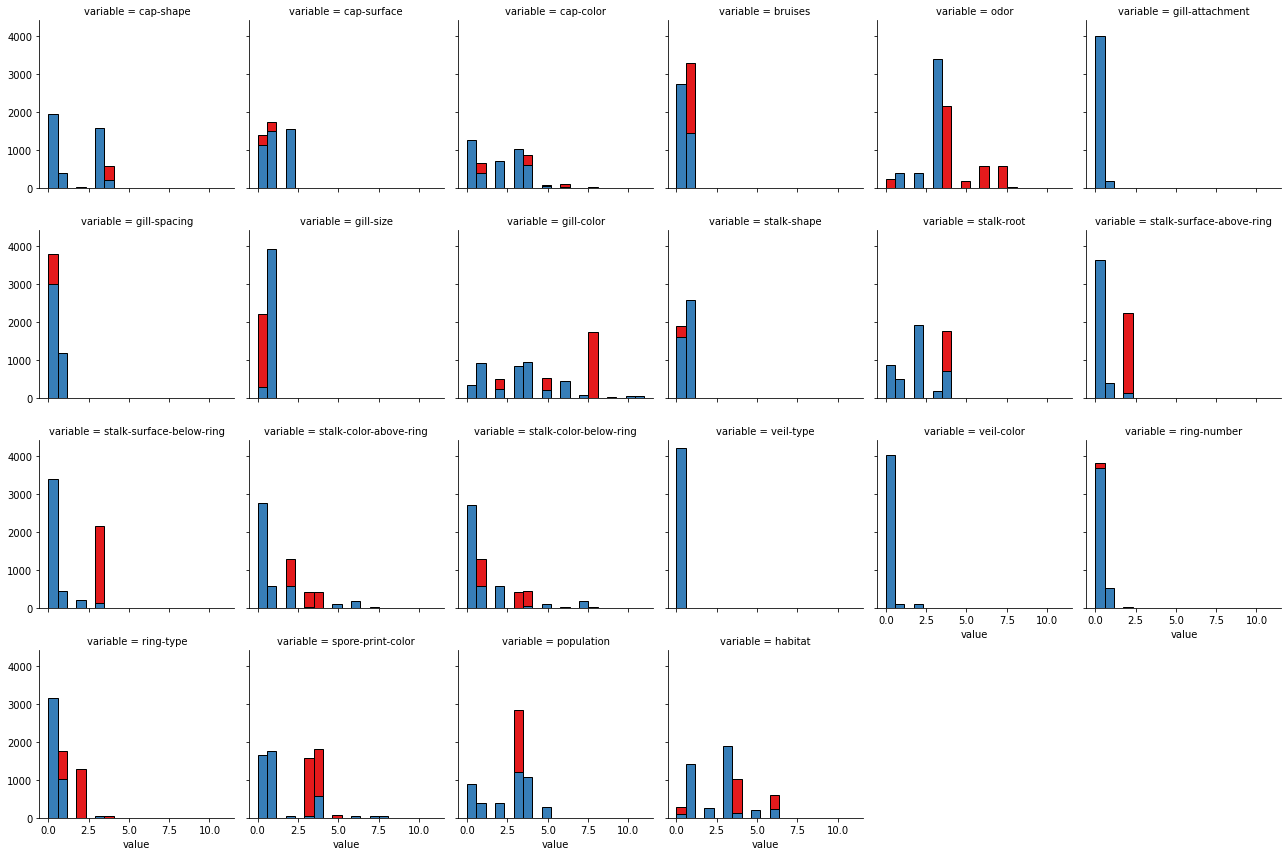

In [5]:
#Convert categorical variables into numerical variables for plotting purposes
#approach adapted from: https://stackoverflow.com/questions/45883598/pandas-histogram-df-hist-group-by
mush2=mush.apply(lambda x: pd.factorize(x)[0]) #Convert categorical data to numeric data
mush3=pd.melt(mush2,id_vars='class', value_vars=list(mush2.columns)[1:], value_name='value')

#Seaborn and matplotlib plotting
bins=np.linspace(mush3.value.min(), mush3.value.max(), 20)  #make bins
g = sns.FacetGrid(mush3, col="variable", hue="class", palette="Set1", col_wrap=6)
#g.map(sns.kdeplot, 'value')
g.map(plt.hist, 'value', bins=bins, ec="k")

#### HOMEWORK QUESTIONS: (2 points each)

* What do the red and blue colors represent?

* Based on the distributions, which properties do you think are most differentiating between edible and poisonous mushrooms?

<h2>Running classification</h2>

Now lets run some classification algorithms. First, we will see how to run a standard classification algorithm like Decision Tree. Decision tree is a very basic, and frequently bad algorithm but is conceptually easy to understand. After running decision tree on the training set, we will check its performance on the test set. After that, we will perform ensemble learning by deploying a whole bunch of classifier models on the data, and see which model fits the data the best.

The first function we will use is setup(). Setup is a very powerful function. The following command appears very simple but there are dozens of parameters you can tune in the setup function, most of which are normally set to default.

In [6]:
import pycaret
from pycaret import classification

In [7]:
mush_setup = classification.setup(data= mush, target='class')

,Description,Value
0,session_id,3190
1,Target,class
2,Target Type,Binary
3,Label Encoded,"e: 0, p: 1"
4,Original Data,"(8124, 23)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


You can see there are 43 different properties being set. The command divided the entire set of 8134 instances into training and test. 

#### HOMEWORK QUESTIONS: (2 points each)

* What percentage of the dataset was kept for test?

You can modify the parameters provided by specifying them inside the brackets in the command above. For help on the command, run the following

In [8]:
help(classification.setup) 

#Do the defaults tell you what is the training dataset size?
#Under what circumstances would you change it?

Help on function setup in module pycaret.classification:

setup(data: pandas.core.frame.DataFrame, target: str, train_size: float = 0.7, test_data: Union[pandas.core.frame.DataFrame, NoneType] = None, preprocess: bool = True, imputation_type: str = 'simple', iterative_imputation_iters: int = 5, categorical_features: Union[List[str], NoneType] = None, categorical_imputation: str = 'constant', categorical_iterative_imputer: Union[str, Any] = 'lightgbm', ordinal_features: Union[Dict[str, list], NoneType] = None, high_cardinality_features: Union[List[str], NoneType] = None, high_cardinality_method: str = 'frequency', numeric_features: Union[List[str], NoneType] = None, numeric_imputation: str = 'mean', numeric_iterative_imputer: Union[str, Any] = 'lightgbm', date_features: Union[List[str], NoneType] = None, ignore_features: Union[List[str], NoneType] = None, normalize: bool = False, normalize_method: str = 'zscore', transformation: bool = False, transformation_method: str = 'yeo-johnson', 

One curious thing about this dataset -- as you saw above -- is that all features are categorical. However, categorical features cannot be used directly in machine learning. So how is the algorithm using these features? Let us see what's in __mush_dt__ As you will see below, all categorical features have been converted to 1s and 0s using __one-hot-encoding__

In [ ]:
mush_setup[1]

In [9]:
# We will use the function create_model to create a trained model. Let's look at what it actually does first.
# build the decision tree model
mush_dt = classification.create_model('dt')

# Do you like the overall performance of the model?

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [10]:
# The output shown above is fancy. Is that mush_dt?

mush_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 3190,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': 'deprecated',
 'ccp_alpha': 0.0,
 'n_features_in_': 105,
 'n_features_': 105,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 105,
 'tree_': <sklearn.tree._tree.Tree at 0x25980374dc0>}

This shows you what an ML classifier actually is. It is basically a set of parameters optimized for a given dataset

In [11]:
# In this case, model performance is perfect, so you won't need this. But in most cases
# performance is not optimal. In those situations, you will have to tune the parameters in your model.
# PyCaret allows you to do the tuning using a very short default command
tune_dt = classification.tune_model(mush_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


So now you have obtained a model with decision tree. Before we evaluate this model using various methods, lets take a quick look at how, instead of selecting one model, we can actually test over a dozen different classifiers at the same time and find out the best one. 

In [12]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2470
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0220
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0300
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1600
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0480
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1330
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3330
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1190
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3330
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0560


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

#### HOMEWORK QUESTIONS: (2 points each)

* The performance is phenomenally high with even the most basic models. What are your hypotheses about why the performance is so perfect?

## Model evaluation

Let us first check the performance of the model on the test data. We will plot standard Area Under the Receiver Operating Characteristic (AUROC) curve and Precision-Recall (PR) curve. After that we will dig a little deeper into the features that are the most important for determining model performance.

In [ ]:
# AUC-ROC plot
#classification.plot_model(mush_dt, plot = 'auc')

# Decision Boundary
classification.plot_model(mush_dt, plot = 'feature')

#### HOMEWORK QUESTIONS: (2 points each)

* Which feature is the most important for classification?

In [ ]:
help(classification.plot_model)

In [ ]:
# Instead of running individual commands for separate plots, you can also
# run evaluate_model and get different metrics simultaneously. Plus, you don't have to remember all the plots
# that can be made for decision tree (or any other classifier you use)
classification.evaluate_model(mush_dt)

In [ ]:
# make predictions using the test set
predictions = classification.predict_model(mush_dt)
# view the predictions
predictions

## Model interpretation

In [ ]:
classification.interpret_model(mush_dt)

Again, __information about the different features can be [found here](https://archive.ics.uci.edu/ml/datasets/Mushroom)__

Let us check the distribution of these features in edible and poisonous mushrooms, just to verify the findings of the ML model

In [ ]:
mush_setup[0]

In [ ]:
cmush=pd.concat([pd.DataFrame(mush_setup[1]),pd.DataFrame(mush_setup[0])], axis=1)
#print (cmush.head())
columns_to_show = ['odor_n', 'stalk-root_c', 'stalk-root_r']
cmush.groupby(['class'])[columns_to_show].sum()
#cmush.groupby(['class']).sum()

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

In [ ]:
#Adapted from: https://www.kaggle.com/mig555/mushroom-classification
poisonous = [] 
edible = []    
odor_labels = mush['odor'].value_counts()
odor_labels_list=list(odor_labels.index)
ind=np.arange(len(odor_labels_list))
for odor in odor_labels_list:
    size = len(mush[mush['odor'] == odor].index)
    edibles = len(mush[(mush['odor'] == odor) & (mush['class'] == 'e')].index)
    edible.append(edibles)
    poisonous.append(size - edibles)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)


#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible , width, color='green')
poison_bars = ax.bar(ind+width, poisonous , width, color='red')


#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
#almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(['none','foul','fishy','spicy','almond','anise','pungent','creosote','musty'], fontsize = 12)
ax.legend((edible_bars, poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible)
print(poisonous)

#### FINAL HOMEWORK QUESTION: (4 points)

* You've got perfect classification on your ML model. Congratulations! If you are lost in the wilderness, do the results give you confidence that you can distinguish between poisonous and edible mushrooms by looking at the top 2 features? Why or why not?